In [1]:
# import modules

import pandas as pd
import yfinance as yf
import pypfopt
from pandas_datareader import DataReader
from pypfopt import plotting
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from datetime import date
from dateutil.relativedelta import relativedelta
from yahooquery import Screener

# set dates

start_date = date.today() - relativedelta(months = 12)
end_date = date.today()

In [17]:
# download data

s = Screener()
data = s.get_screeners('undervalued_large_caps', count = 25)
data_unsorted = pd.DataFrame(data['undervalued_large_caps']['quotes'])
data_sorted = data_unsorted.sort_values(by='priceHint', ascending=True) # is this forecast?
df = pd.DataFrame(data_sorted,columns = ['symbol'])
assets = df.values.tolist()

data = pd.DataFrame()

for asset in assets:
  data[asset] = DataReader(asset, 'yahoo', start_date, end_date)['Close']

In [18]:
# calculate expected returns and sample covariance

mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# optimize for maximal Sharpe ratio

ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 220.6%
Annual volatility: 36.7%
Sharpe Ratio: 5.95


(2.2057433939739735, 0.3672469397341287, 5.95169940845895)

In [19]:
# optimization

latest_prices = get_latest_prices(data)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value = 1000)

allocation, leftover = da.lp_portfolio()
allocation2, leftover2 = da.greedy_portfolio()

print("Integer:")
print("Discrete allocation", allocation)
print("Funds remaining: ${:.2f}".format(leftover))
print("")
print("Greedy:")
print("Discrete allocation", allocation2)
print("Funds remaining: ${:.2f}".format(leftover2))

Integer:
Discrete allocation {'F': 9, 'UMC': 24, 'LB': 6, 'VIAC': 1, 'IVZ': 6, 'LYG': 2}
Funds remaining: $1.41

Greedy:
Discrete allocation {'LB': 6, 'UMC': 24, 'IVZ': 6, 'F': 9, 'VIAC': 1}
Funds remaining: $6.33


<AxesSubplot:>

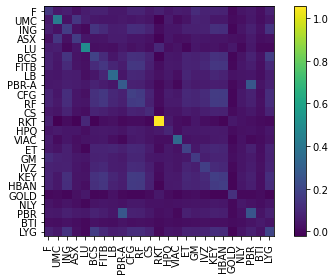

In [20]:
pypfopt.plotting.plot_covariance(S)

In [ ]:
# Here is the list of all available screeners:

[
    'accident_health_insurance',
    'advertising_agencies',
    'aerospace_defense_major_diversified',
    'aerospace_defense_products_services',
    'aggressive_small_caps',
    'agricultural_chemicals',
    'air_delivery_freight_services',
    'air_services_other',
    'all_cryptocurrencies_au',
    'all_cryptocurrencies_ca',
    'all_cryptocurrencies_eu',
    'all_cryptocurrencies_gb',
    'all_cryptocurrencies_in',
    'all_cryptocurrencies_us',
    'aluminum',
    'apparel_stores',
    'appliances',
    'application_software',
    'asset_management',
    'auto_dealerships',
    'auto_manufacturers_major',
    'auto_parts',
    'auto_parts_stores',
    'auto_parts_wholesale',
    'basic_materials',
    'basic_materials_wholesale',
    'beverages_brewers',
    'beverages_soft_drinks',
    'beverages_wineries_distillers',
    'biotechnology',
    'broadcasting_radio',
    'broadcasting_tv',
    'building_materials_wholesale',
    'business_equipment',
    'business_services',
    'business_software_services',
    'catalog_mail_order_houses',
    'catv_systems',
    'cement',
    'chemicals_major_diversified',
    'cigarettes',
    'cleaning_products',
    'closedend_fund_debt',
    'closedend_fund_equity',
    'closedend_fund_foreign',
    'communication_equipment',
    'computer_based_systems',
    'computer_peripherals',
    'computers_wholesale',
    'confectioners',
    'conglomerates',
    'conservative_foreign_funds',
    'consumer_defensive',
    'consumer_goods',
    'consumer_services',
    'copper',
    'credit_services',
    'dairy_products',
    'data_storage_devices',
    'day_gainers',
    'day_gainers_americas',
    'day_gainers_asia',
    'day_gainers_au',
    'day_gainers_br',
    'day_gainers_ca',
    'day_gainers_de',
    'day_gainers_dji',
    'day_gainers_es',
    'day_gainers_europe',
    'day_gainers_fr',
    'day_gainers_gb',
    'day_gainers_hk',
    'day_gainers_in',
    'day_gainers_it',
    'day_gainers_ndx',
    'day_gainers_nz',
    'day_gainers_sg',
    'day_losers',
    'day_losers_americas',
    'day_losers_asia',
    'day_losers_au',
    'day_losers_br',
    'day_losers_ca',
    'day_losers_de',
    'day_losers_dji',
    'day_losers_es',
    'day_losers_europe',
    'day_losers_fr',
    'day_losers_gb',
    'day_losers_hk',
    'day_losers_in',
    'day_losers_it',
    'day_losers_ndx',
    'day_losers_nz',
    'day_losers_sg',
    'department_stores',
    'diagnostic_substances',
    'discount_variety_stores',
    'diversified_communication_services',
    'diversified_computer_systems',
    'diversified_electronics',
    'diversified_investments',
    'diversified_machinery',
    'diversified_utilities',
    'drug_delivery',
    'drug_manufacturers_major',
    'drug_manufacturers_other',
    'drug_related_products',
    'drug_stores',
    'drugs_generic',
    'drugs_wholesale',
    'education_training_services',
    'electric_utilities',
    'electronic_equipment',
    'electronics_stores',
    'electronics_wholesale',
    'entertainment_diversified',
    'fair_value_screener',
    'farm_construction_machinery',
    'farm_products',
    'financial',
    'food_major_diversified',
    'food_wholesale',
    'foreign_money_center_banks',
    'foreign_regional_banks',
    'foreign_utilities',
    'gaming_activities',
    'gas_utilities',
    'general_building_materials',
    'general_contractors',
    'general_entertainment',
    'gold',
    'grocery_stores',
    'growth_technology_stocks',
    'health_care_plans',
    'healthcare',
    'healthcare_information_services',
    'heavy_construction',
    'high_yield_bond',
    'home_furnishing_stores',
    'home_furnishings_fixtures',
    'home_health_care',
    'home_improvement_stores',
    'hospitals',
    'housewares_accessories',
    'independent_oil_gas',
    'industrial_electrical_equipment',
    'industrial_equipment_components',
    'industrial_equipment_wholesale',
    'industrial_goods',
    'industrial_metals_minerals',
    'information_delivery_services',
    'information_technology_services',
    'insurance_brokers',
    'internet_information_providers',
    'internet_service_providers',
    'internet_software_services',
    'investment_brokerage_national',
    'investment_brokerage_regional',
    'jewelry_stores',
    'life_insurance',
    'lodging',
    'long_distance_carriers',
    'longterm_care_facilities',
    'lumber_wood_production',
    'machine_tools_accessories',
    'major_airlines',
    'major_integrated_oil_gas',
    'management_services',
    'marketing_services',
    'meat_products',
    'medical_appliances_equipment',
    'medical_equipment_wholesale',
    'medical_instruments_supplies',
    'medical_laboratories_research',
    'mega_cap_hc',
    'metal_fabrication',
    'money_center_banks',
    'mortgage_investment',
    'most_actives',
    'most_actives_americas',
    'most_actives_asia',
    'most_actives_au',
    'most_actives_br',
    'most_actives_ca',
    'most_actives_de',
    'most_actives_dji',
    'most_actives_es',
    'most_actives_europe',
    'most_actives_fr',
    'most_actives_gb',
    'most_actives_hk',
    'most_actives_in',
    'most_actives_it',
    'most_actives_ndx',
    'most_actives_nz',
    'most_actives_sg',
    'most_watched_tickers',
    'movie_production_theaters',
    'ms_basic_materials',
    'ms_communication_services',
    'ms_consumer_cyclical',
    'ms_consumer_defensive',
    'ms_energy',
    'ms_financial_services',
    'ms_healthcare',
    'ms_industrials',
    'ms_real_estate',
    'ms_technology',
    'ms_utilities',
    'multimedia_graphics_software',
    'networking_communication_devices',
    'nonmetallic_mineral_mining',
    'office_supplies',
    'oil_gas_drilling_exploration',
    'oil_gas_equipment_services',
    'oil_gas_pipelines',
    'oil_gas_refining_marketing',
    'packaging_containers',
    'paper_paper_products',
    'personal_products',
    'personal_services',
    'photographic_equipment_supplies',
    'pollution_treatment_controls',
    'portfolio_anchors',
    'printed_circuit_boards',
    'processed_packaged_goods',
    'processing_systems_products',
    'property_casualty_insurance',
    'property_management',
    'publishing_books',
    'publishing_newspapers',
    'publishing_periodicals',
    'railroads',
    'real_estate_development',
    'recreational_goods_other',
    'recreational_vehicles',
    'regional_airlines',
    'regional_midatlantic_banks',
    'regional_midwest_banks',
    'regional_northeast_banks',
    'regional_pacific_banks',
    'regional_southeast_banks',
    'regional_southwest_banks',
    'reit_diversified',
    'reit_healthcare_facilities',
    'reit_hotel_motel',
    'reit_industrial',
    'reit_office',
    'reit_residential',
    'reit_retail',
    'rental_leasing_services',
    'research_services',
    'residential_construction',
    'resorts_casinos',
    'restaurants',
    'rubber_plastics',
    'savings_loans',
    'scientific_technical_instruments',
    'security_protection_services',
    'security_software_services',
    'semiconductor_broad_line',
    'semiconductor_equipment_materials',
    'semiconductor_integrated_circuits',
    'semiconductor_memory_chips',
    'semiconductor_specialized',
    'services',
    'shipping',
    'silver',
    'small_cap_gainers',
    'small_tools_accessories',
    'solid_large_growth_funds',
    'solid_midcap_growth_funds',
    'specialized_health_services',
    'specialty_chemicals',
    'specialty_eateries',
    'specialty_retail_other',
    'sporting_activities',
    'sporting_goods',
    'sporting_goods_stores',
    'staffing_outsourcing_services',
    'steel_iron',
    'surety_title_insurance',
    'synthetics',
    'technical_services',
    'technical_system_software',
    'technology',
    'telecom_services_domestic',
    'telecom_services_foreign',
    'textile_apparel_clothing',
    'textile_apparel_footwear_accessories',
    'textile_industrial',
    'tobacco_products_other',
    'top_energy_us',
    'top_etfs',
    'top_etfs_hk',
    'top_etfs_in',
    'top_etfs_us',
    'top_iv_options_us',
    'top_mutual_funds',
    'top_mutual_funds_au',
    'top_mutual_funds_br',
    'top_mutual_funds_ca',
    'top_mutual_funds_de',
    'top_mutual_funds_es',
    'top_mutual_funds_fr',
    'top_mutual_funds_gb',
    'top_mutual_funds_hk',
    'top_mutual_funds_in',
    'top_mutual_funds_it',
    'top_mutual_funds_nz',
    'top_mutual_funds_sg',
    'top_mutual_funds_us',
    'top_options_implied_volatality',
    'top_options_open_interest',
    'toy_hobby_stores',
    'toys_games',
    'trucking',
    'trucks_other_vehicles',
    'undervalued_growth_stocks',
    'undervalued_large_caps',
    'utilities',
    'waste_management',
    'water_utilities',
    'wireless_communications'
]